# Tessellation
Create an Escher lizard tesselation
http://mathstat.slu.edu/escher/index.php/Tessellations_by_Recognizable_Figures


In [91]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import pandas as pd
import numpy as np
from matplotlib.pyplot import *

from matplotlib import animation, rc
from IPython.display import HTML
from math import *

Using the raw data from [Instructables: Tesselating lizard](http://www.instructables.com/id/Tessellating-Lizards/?ALLSTEPS). This data is not properly tessellated!

In [97]:
raw_lizard = pd.read_csv('lizard.csv')
raw_lizard.head()

,x,y
0,316.750,6.625
1,329.000,59.875
2,310.125,111.875
3,284.625,127.375
4,237.000,110.750


In [136]:
# First coordinate is rotation point
# http://scipython.com/book/chapter-6-numpy/examples/creating-a-rotation-matrix-in-numpy/
def single_rotation(coord, angle):
    c = np.cos(np.radians(angle))
    s = np.sin(np.radians(angle))
    R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    return coord*R

def rotate(coords, angle):
    new_coord = coords - coords[0]
    
    for i in range(len(new_coord)):
        new_coord[i] = single_rotation(new_coord[i], angle)
        
    return new_coord + coords[0]

(0.0, 500.0, 0.0, 450.0)

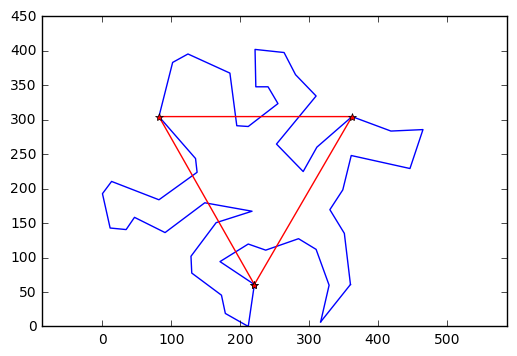

In [109]:
# show that verticies 8, 26 and 42 almost form an equilateral triangle
triangle_indeces = [7, 25, 41, 7]
close_indeces = [len(raw_lizard)-1, 0]

plot(raw_lizard['x'], raw_lizard['y'], 'b')
plot(raw_lizard['x'][close_indeces], raw_lizard['y'][close_indeces], 'b')
plot(raw_lizard['x'][triangle_indeces], raw_lizard['y'][triangle_indeces], 'r-*')
axis('equal')

The 3 corners do not form a Equilateral Triangle. Lets fix this. Assume part1 is in the correct place and move 2 and 3 such that we do have a equilateral triangle

In [160]:
part1 = raw_lizard[7:(7+10)].values
part2 = raw_lizard[25:(25+10)].values
part3 = raw_lizard[41:(41+8)].values

# Get the average length of the side
side_length = (np.linalg.norm(part1[0]-part2[0])+np.linalg.norm(part2[0]-part3[0])+np.linalg.norm(part3[0]-part1[0]))/3.0

# Get theoretical start points wrt part1
start_part2 = single_rotation(np.array([0, side_length]), -30.0)+part1[0]
start_part3 = single_rotation(np.array([0, side_length]), 30.0)+part1[0]

# Calculate the error between the theory and actual coordinates
start_error_part2 = start_part2-part2[0]
start_error_part3 = start_part3-part3[0]

for i in range(len(part2)):
    part2[i] = part2[i] + start_error_part2

for i in range(len(part3)):
    part3[i] = part3[i] + start_error_part3
    
rot_part1 = rotate(part1, 120.0)
rot_part2 = rotate(part2, 120.0)
rot_part3 = rotate(part3, 120.0)

(0.0, 500.0, 0.0, 450.0)

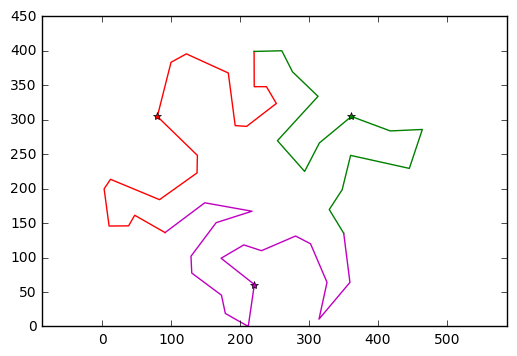

In [168]:
plot(part1[:,0], part1[:,1], 'm')
plot(rot_part1[:, 0], rot_part1[:, 1], 'm')
plot(rot_part1[0, 0], rot_part1[0, 1], '*m')

plot(part2[:,0], part2[:,1], 'r')
plot(rot_part2[:, 0], rot_part2[:, 1], 'r')
plot(rot_part2[0, 0], rot_part2[0, 1], '*r')

plot(part3[:,0], part3[:,1], 'g')
plot(rot_part3[:, 0], rot_part3[:, 1], 'g')
plot(rot_part3[0, 0], rot_part3[0, 1], '*g')

axis('equal')

In [161]:
print('Check if we have a nice equilateral triangle, all sides should be the same length')

print('Length 1,2: ' + str(np.linalg.norm(part1[0]-part2[0])))
print('Length 2,3: ' + str(np.linalg.norm(part2[0]-part3[0])))
print('Length 3,1: ' + str(np.linalg.norm(part3[0]-part1[0])))

Check if we have a nice equilateral triangle, all sides should be the same length
Length 1,2: 281.668589156
Length 2,3: 281.668589156
Length 3,1: 281.668589156


Now that we have a nice equilateral triangle, fix the end points of the 3 vectors `part`. All endpoints should be the same so everything is connected. 

In [167]:
print('Part 1: ' + str(part1[-1]))
print('Rot Part 2: ' + str(rot_part2[-1]))
rot_part2[-1] = part1[-1]

print('Rot Part 1: ' + str(rot_part1[-1]))
print('Part 3: ' + str(part3[-1]))
rot_part1[-1] = part3[-1]

print('Part 2: ' + str(part2[-1]))
print('Rot Part 3: ' + str(rot_part3[-1]))
part2[-1] = rot_part3[-1]

Part 1: [  90.875  136.25 ]
Rot Part 2: [  90.875  136.25 ]
Rot Part 1: [ 350.58916481  135.44604297]
Part 3: [ 350.20929458  135.30715366]
Part 2: [ 219.16570542  402.30715366]
Rot Part 3: [ 220.10548864  399.19168627]


The fixed lizard

In [ ]:
plot(part1[:,0], part1[:,1], 'm')
plot(rot_part1[:, 0], rot_part1[:, 1], 'm')
plot(rot_part1[0, 0], rot_part1[0, 1], '*m')

plot(part2[:,0], part2[:,1], 'r')
plot(rot_part2[:, 0], rot_part2[:, 1], 'r')
plot(rot_part2[0, 0], rot_part2[0, 1], '*r')

plot(part3[:,0], part3[:,1], 'g')
plot(rot_part3[:, 0], rot_part3[:, 1], 'g')
plot(rot_part3[0, 0], rot_part3[0, 1], '*g')

axis('equal')